In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('dark_background')
from sklearn import linear_model

In [3]:
x = np.random.gamma(shape=5, scale=10, size=1000)
y = x * 3 + np.random.normal(0,10,1000)
type(x), type(y), x.shape, y.shape


(numpy.ndarray, numpy.ndarray, (1000,), (1000,))

There are some functions that are very useful in numpy.  
These are:
1. numpy.reshape(): allows to create the indexing of the array we prefer. Check [this](http://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r) out.
2. numpy.dstack(): allows to merge two numpy.array with a syntax like np.dstack((a,b))  

This is very important because scikit learn is very fassy about the data structure it receives as an input.

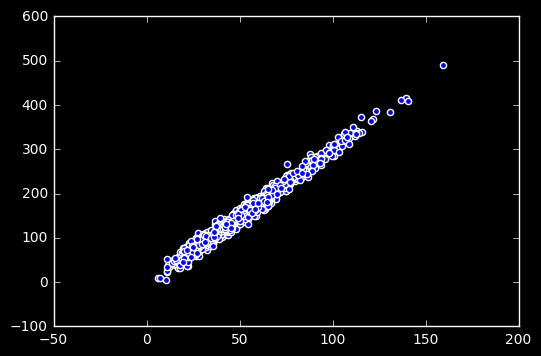

In [4]:
train_X = x[:-100].reshape((900,1))
test_X = x[900:].reshape((100,1))
train_Y = y[:-100].reshape((900,1))
test_Y = y[900:].reshape((100,1))
plt.scatter(train_X, train_Y);

In [5]:
my_model = linear_model.LinearRegression()

In [6]:
my_model.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

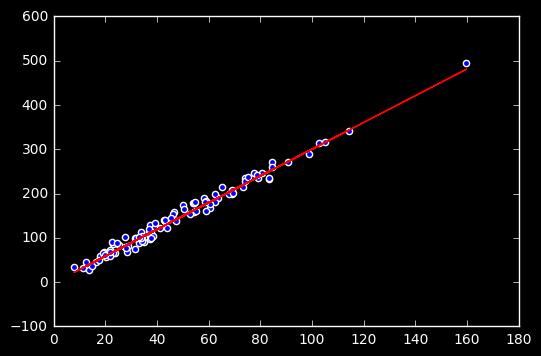

In [7]:
plt.scatter(test_X, test_Y)
plt.plot(test_X,
         my_model.predict(test_X),
         linewidth=1, color='red'
        )
plt.show();

In [8]:
my_model.__dict__, my_model.score(test_X,test_Y)

({'_residues': array([ 92507.93474955]),
  'coef_': array([[ 3.0201647]]),
  'copy_X': True,
  'fit_intercept': True,
  'intercept_': array([-1.8595195]),
  'n_jobs': 1,
  'normalize': False,
  'rank_': 1,
  'singular_': array([ 687.92540528])},
 0.98191319560737467)

This is to verify that the residuals distributes like a normal distribution and their varianca stays constant.

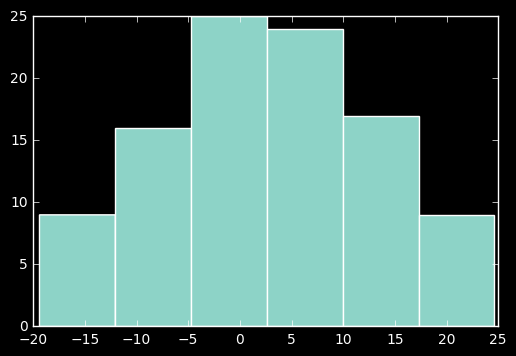

In [29]:
residuals = test_Y - my_model.predict(test_X)
plt.hist(residuals,bins=int(len(residuals)/15));

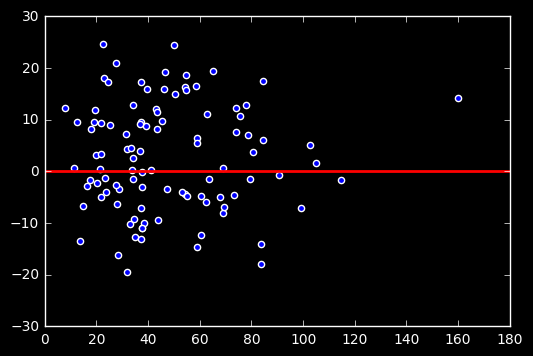

In [24]:
plt.scatter(x=test_X, y=residuals)
plt.axhline(y=0, xmin=0, xmax=260, linewidth=2, color = 'r');